In [25]:
#Dataset Exploration
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from PIL import Image
import glob

In [143]:
path = "../data/training/scene/"
path2 = "../data/training/Preprocessing/"
files = os.listdir(path)

ImgClean = []
ImgCropped = []
ImgAug = []

""""#To import files in sorted manner when files are in more amount
for i in range(0,len(files)):
    f=path+"car"+str(i)+".png"
    ImgClean.append(np.asarray(Image.open(f)))"""

for f in files:
    dest = path+f
    ImgClean.append(np.asarray(Image.open(dest)))    

for f in os.listdir(path2+"augmented"):
    dest=path2+"augmented/"+f
    ImgAug.append(np.asarray(Image.open(dest)))    

for f in os.listdir(path2+"cropped"):
    dest =path2+"cropped/"+f
    ImgCropped.append(np.asarray(Image.open(dest)))    


In [36]:
import json

# Read the data
data0 = pd.read_json('../data/training/data_woConcat.json', lines=True)
pd.set_option('display.max_colwidth', -1)

# And drop the content info
del data0['content']

#dictionary format
data0 = data0.to_dict()

In [66]:
im = Image.fromarray(ImgClean[0])
plateClean = im.crop((data0['points'][0]['0'][0]['x']*np.array(im).shape[1],
                     data0['points'][0]['0'][0]['y']*np.array(im).shape[0],
                     data0['points'][0]['0'][1]['x']*np.array(im).shape[1],
                     data0['points'][0]['0'][1]['y']*np.array(im).shape[0])
                    )
plateClean = np.array(plateClean)

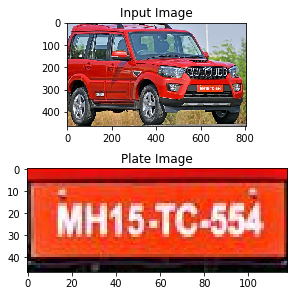

In [67]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(2, 1, constrained_layout=True)

# Set title
ax[0].set_title('Input Image')
ax[1].set_title('Plate Image')

# Display the images
ax[0].imshow(im)
ax[1].imshow(plateClean)

plt.show()

In [119]:
i=238
imaug = Image.fromarray(ImgAug[1])
plateAug = imaug.crop((data0['points'][0][str(i)][0]['x']*np.array(imaug).shape[1],
                     data0['points'][0][str(i)][0]['y']*np.array(imaug).shape[0],
                     data0['points'][0][str(i)][1]['x']*np.array(imaug).shape[1],
                     data0['points'][0][str(i)][1]['y']*np.array(imaug).shape[0])
                    )
plateAug = np.array(plateAug)

In [148]:
k=476
imcropped = Image.fromarray(ImgCropped[2])
plateCropped = imcropped.crop((data0['points'][0][str(k)][0]['x']*np.array(imcropped).shape[1],
                     data0['points'][0][str(k)][0]['y']*np.array(imcropped).shape[0],
                     data0['points'][0][str(k)][1]['x']*np.array(imcropped).shape[1],
                     data0['points'][0][str(k)][1]['y']*np.array(imcropped).shape[0])
                    )
plateCropped = np.array(plateCropped)

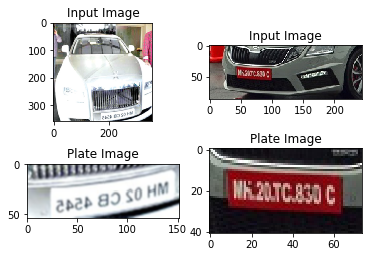

In [150]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(2, 2, constrained_layout=False)

# Set title
ax[0][0].set_title('Input Image')
ax[1][0].set_title('Plate Image')
ax[0][1].set_title('Input Image')
ax[1][1].set_title('Plate Image')

# Display the images
ax[0][0].imshow(imaug)
ax[1][0].imshow(plateAug)
ax[0][1].imshow(imcropped)
ax[1][1].imshow(plateCropped)

plt.show()